<a href="https://colab.research.google.com/github/nikithajain888/tracker-api/blob/main/Cs6022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import operator
import json
from itertools import islice
from heapq import nlargest
import re
from collections import defaultdict

Users data 

In [11]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('/users.dat', sep='::', header=None, names=unames, engine='python')
print(users[:5])

   user_id gender  age  occupation    zip
0        1      F    1          10  48067
1        2      M   56          16  70072
2        3      M   25          15  55117
3        4      M   45           7  02460
4        5      M   25          20  55455


Ratings data

In [12]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/ratings.dat', sep='::', header=None, names=rnames, engine='python')
print(ratings[:5])

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291


Movies data

In [13]:
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('/movies.dat', sep='::', header=None, names=mnames, engine='python',encoding='latin-1')
print(movies[:5])

   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of the Bride Part II (1995)                        Comedy


Merge data table of Ratings, Users, Movies and print the length of the dataset.

In [14]:
movie_rating_data = pd.merge(pd.merge(ratings, users), movies)
print(len(movie_rating_data))

1000209


Extracting all the unique genres from genres.

In [15]:
unique_genres=pd.unique(movie_rating_data["genres"].str.split("|", expand=True).stack())

Question 1 - An aggregate on the number of rating done for each particular genre, e.g.,
Action, Adventure, Drama, Science Fiction, ...

In [19]:
aggregate_genres_ratings = dict.fromkeys(unique_genres, 0)
for index,row in movie_rating_data.iterrows():
  list_temp=row['genres'].split('|')
  for j in list_temp:
    aggregate_genres_ratings[j]+=row['rating']
for val in aggregate_genres_ratings:
    print(val, ":", aggregate_genres_ratings.get(val))

Drama : 1335274
Animation : 159529
Children's : 247023
Musical : 152240
Romance : 532184
Comedy : 1255910
Action : 898830
Adventure : 465789
Fantasy : 125143
Sci-Fi : 545263
War : 266798
Thriller : 677246
Crime : 294992
Mystery : 147377
Western : 75240
Horror : 245582
Film-Noir : 74417
Documentary : 31111


Q2 - The top 5 ranked genres by women on most number of rating.

In [20]:
aggregate_genres_ratings_women = dict.fromkeys(unique_genres, 0)
aggregate_number_ratings_women = dict.fromkeys(unique_genres, 0)
for index, row in movie_rating_data.iterrows():
  if row['gender']=='F':
    list_temp=row['genres'].split('|')
    for j in list_temp:
      aggregate_genres_ratings_women[j]+=row['rating']
      aggregate_number_ratings_women[j]+=1
for key in aggregate_number_ratings_women.keys():
  if aggregate_number_ratings_women[key]!=0:
    aggregate_genres_ratings_women[key]/=aggregate_number_ratings_women[key]
res = nlargest(5, aggregate_genres_ratings_women, key = aggregate_genres_ratings_women.get)
for val in res:
    print(val, ":", aggregate_genres_ratings_women.get(val))

Film-Noir : 4.018086625416468
Documentary : 3.94639175257732
War : 3.893138437522174
Musical : 3.8091077378748612
Drama : 3.7656617729463187


Q3 - The top 5 ranked genres by men on most number of rating.

In [21]:
aggregate_genres_ratings_men = dict.fromkeys(unique_genres, 0)
aggregate_number_ratings_men = dict.fromkeys(unique_genres, 0)
for index, row in movie_rating_data.iterrows():
  if row['gender']=='M':
    list_temp=row['genres'].split('|')
    for j in list_temp:
      aggregate_genres_ratings_men[j]+=row['rating']
      aggregate_number_ratings_men[j]+=1
for key in aggregate_number_ratings_men.keys():
  if aggregate_number_ratings_men[key]!=0:
    aggregate_genres_ratings_men[key]/=aggregate_number_ratings_men[key]
res = nlargest(5, aggregate_genres_ratings_men, key = aggregate_genres_ratings_men.get)
for val in res:
    print(val, ":", aggregate_genres_ratings_men.get(val))

Film-Noir : 4.092254072124618
Documentary : 3.9288107202680065
War : 3.8933754638644964
Drama : 3.7665889162792148
Crime : 3.7137197102965183


Q4 - Pick a genre of your choice and provide average movie’s ratings by the following
four time intervals during which the movies were released (a) 1970 to 1979 (b) 1980 to
1989 (c) 1990 to 1999 (d) 2000 to 2009. Also, if you observed any issues with data in
any of these ranges, please mention it.

In [22]:
average_ratings_ranges_year={'a':0,'b':0,'c':0,'d':0}
average_ratings_number_year={'a':0,'b':0,'c':0,'d':0}
for index, row in movie_rating_data.iterrows():
  if 'Drama' in row['genres']:
    row['Values'] = re.search(r"(\d{4})", row['title']).group(1)
    temp_year=int(row['Values'])
    if temp_year>=1970 and temp_year<=1979:
      average_ratings_ranges_year['a']+=(row['rating'])
      average_ratings_number_year['a']+=1
    elif temp_year>=1980 and temp_year<=1989:
      average_ratings_ranges_year['b']+=(row['rating'])
      average_ratings_number_year['b']+=1
    elif temp_year>=1990 and temp_year<=1999:
      average_ratings_ranges_year['c']+=(row['rating'])
      average_ratings_number_year['c']+=1
    elif temp_year>=2000 and temp_year<=2009:
      average_ratings_ranges_year['d']+=(row['rating'])
      average_ratings_number_year['d']+=1
res = defaultdict(str)
for key in average_ratings_ranges_year:
  res[key]=average_ratings_ranges_year[key]/average_ratings_number_year[key]
for k,v in res.items():
  print(k +': '+str(v))

a: 4.017183664360633
b: 3.7917650354127486
c: 3.664984195220635
d: 3.675250357653791


Q5 - A function that given a genre and a rating_range (i.e. [3.5, 4]), returns all
the movies of that genre and within that rating range sorted by average rating. Using
an example, demonstrate that your function works.

In [23]:
def movies_with_genre_rating(genre,rating):
  d_aggr_rating=defaultdict(int)
  d_num_rating=defaultdict(int)
  for idx,row in movie_rating_data.iterrows():
    if genre in row['genres'].split('|'):
      d_aggr_rating[row['title']]+=row['rating']
      d_num_rating[row['title']]+=1
  res = defaultdict(int)
  for key in d_aggr_rating:
    if rating[0]<=d_aggr_rating[key]/d_num_rating[key]<=rating[1]: 
      res[key]=d_aggr_rating[key]/d_num_rating[key]

  for k,v in sorted(res.items(), key=lambda x: x[1]):
    print("{}: {}".format(k, v))
movies_with_genre_rating('Drama',[3.5,4])

Death and the Maiden (1994): 3.5
Farinelli: il castrato (1994): 3.5
Niagara (1953): 3.5
Golden Bowl, The (2000): 3.5
Blood on the Sun (1945): 3.5
Welcome To Sarajevo (1997): 3.5
Urbania (2000): 3.5
City, The (1998): 3.5
JLG/JLG - autoportrait de décembre (1994): 3.5
Killing of Sister George, The (1968): 3.5
Hollow Reed (1996): 3.5
Tigrero: A Film That Was Never Made (1994): 3.5
First Love, Last Rites (1997): 3.5
Captives (1994): 3.5
Identification of a Woman (Identificazione di una donna) (1982): 3.5
Raining Stones (1993): 3.5
Hangmen Also Die (1943): 3.5
Run of the Country, The (1995): 3.5
Slaves to the Underground (1997): 3.5
Impact (1949): 3.5
I'll Never Forget What's 'is Name (1967): 3.5
Second Best (1994): 3.5
Butcher Boy, The (1998): 3.503225806451613
Talented Mr. Ripley, The (1999): 3.503380916604057
High Art (1998): 3.5037593984962405
Buffalo 66 (1998): 3.505649717514124
Ghosts of Mississippi (1996): 3.506172839506173
Tie Me Up! Tie Me Down! (1990): 3.507575757575758
My Bodygua

Q6 - This code generates a plot that displays the number of users that watch movies of a particular genre. movieratings_age_range is a method that takes in a paramegter genre and returns the graph displaying number of users in different age groups. An interesting observation made was that for all genres, the age group 25 that ranges from "25-35" has the highest number of viewers. 

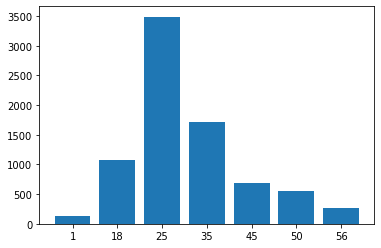

In [44]:
import matplotlib.pyplot as plt
def movieratings_age_range(genre):
  average_age_movies={1:0,18:0,25:0,35:0,45:0,50:0,56:0}
  average_ratings_number_year={'a':0,'b':0,'c':0,'d':0}
  for idx,row in movie_rating_data.iterrows():
    if genre in row['genres'].split('|'):
      average_age_movies[row['age']]+=1
  age_group = list(average_age_movies.keys())
  number_of_viewers = list(average_age_movies.values())
  plt.bar(range(len(average_age_movies)), number_of_viewers, tick_label=age_group)
  plt.show()
movieratings_age_range('Documentary')